# Long Short-Term Memory (LSTM)
- Reference: 
    - [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

## Introduction
- Long Short-Term Memory (LSTM), which is a particular case of a recurrent neural network (RNN)
    - This type of neural network is used to process sequences of data, where *the order matters*.
    - Common application of RNN and LSTM is in natural language processing. 
        - Words in a sentence have an order, and changing that order can completely change the meaning of a sentence
    - Another application where the order of data matters is time series. 
        - We know that time series are sequences of data equally spaced in time, and that their order cannot be changed. 
        - The data point observed at 9 a.m. must come before the data point at 10 a.m. and after the data point at 8 a.m.

## Recurrent Neural Network (RNN)
- A recurrent neural network (RNN) is especially adapted to processing sequences of data. 
- It uses a hidden state that is fed back into the network so it can use past information as an input when processing the next element of a sequence.
<p align="center"><img src="../../assets/img/rnn-architecture.png" width=600><br>Expanded illustration of an RNN</p>

- Expanded illustration of an RNN: an input, denoted as $x_t$, and an output, denoted as $y_t$. 
    - $x_0$ is the first element of a sequence, fed to the RNN, and it computes a hidden state, denoted as $h_0$. 
    - This hidden state acts as memory, and is fed back to the RNN as an input along with $x_1$ to produce the output $y_1$
        - That way, the network effectively uses past information computed for previous elements of the sequence to inform the output for the next element of the sequence.
- Drawbacks: in practice, this means the RNN forgets about past information that is far away in the sequence. It therefore suffers from a short-term memory
    - This short-term memory is due to the vanishing gradient
- Subtypes of RNNs to address the drawback: long short-term memory (LSTM) and gated recurrent unit (GRU)

### Vanishing Gradient
- RNNs suffer from short-term memory, meaning that information from an early element in the sequence will stop having an impact further into the sequence.
    - This short-term memory is due to the **vanishing gradient**.
- The gradient is simply the function that tells the network how to change the weights. 
    - If the change in gradient is large, the weights change by a large magnitude. 
    - If the change in gradient is small, the weights do not change significantly. 
    - The vanishing gradient problem refers to what happens when the change in gradient *becomes very small*, sometimes close to 0. 
        - This in turn means that the weights of the network do not get updated, and the *network stops learning*.
- For example, if an RNN is processing 24 hours of hourly data, the points at hours 9, 10, and 11 might still impact the output at hour 12, but any point prior to hour 9 might not contribute at all to the network’s learning, because the gradient gets very small for those early data points.
- Solution: the long short-term memory (LSTM) architecture, which uses the cell state as an additional way of keeping past information in memory for a long time.

## Long Short-Term Memory (LSTM)
- Long short-term memory (LSTM) is a deep learning architecture that is a subtype of RNN
- The LSTM architecture adds a **cell state** to the RNN architecture to avoid the vanishing gradient problem
    - The addition of the cell state, denoted as $C_{t-1}$ along with an input element of a sequence $x_t$, and a hidden state $h_{t-1}$ are fed into the LSTM 
        - This cell state is what allows the network to keep past information in the network for *a longer time*.
- The LSTM is made up of three gates:
    - The `forget gate` determines what information from past steps is still relevant.
    - The `input gate` determines what information from the current step is relevant.
    - The `output gate` uses the information from the past stored in the network’s memory to process the current element of a sequence to generate a result to the output layer & pass to the next element of the sequence.

<p align="center"><img src="../../assets/img/lstm-architecture.png" width=600><br>The architecture of a LSTM neuron</p>

### Forget Gate
- The `forget gate` is the first gate in an LSTM cell. 
- Its role is to determine what information, from both the past values $C_{t-1}$ and $h_{t-1}$ and the current value of the sequence $x_t$, should be forgotten or kept in the network.
<p align="center"><img src="../../assets/img/lstm-forget-gate.png" width=400><br>The forget gate in an LSTM cell</p>

- Step 1:  the past hidden state $h_{t–1}$ (carries information from past values) and the present value of a sequence $x_t$ are fed into the forget gate. 
- Step 2: $h_{t–1}$ and $x_t$ are combined $[h_{t–1} + x_t]$ and duplicated. 
    - One copy goes straight to the input gate
    - The other copy is sent through a `sigmoid` activation function $f(x)=\frac{1}{1 - e^{-x}}$
        - The sigmoid function determines which information to keep or to forget. 
        - That output is then combined with the previous cell state $C_{t-1}$ using pointwise multiplication. 
            - This results in an **updated cell state** that we call $C'_{t-1}$.
- Step 3: an updated cell state $C'_{t-1}$ & and a copy of the combination of the past hidden state and the current element of the sequence $[h_{t–1} + x_t]$ are sent to the `input gate`.

### Input Gate
- The `input gate` is to determine which information is relevant from the current element of the sequence. 
<p align="center"><img src="../../assets/img/lstm-input-gate.png" width=400><br>The input gate in an LSTM cell</p>

- Step 1: The combination of the past hidden state and the current element of a sequence $[h_{t–1} + x_t]$ coming from the forget gate is fed into the input gate and it is again duplicated.
    - One copy goes out the input gate toward the `output gate`
    - The other copy is sent through the `sigmoid` activation function to determine if the information will be kept or forgotten. - Another copy is sent through the `hyperbolic` tangent ($tanh$) function
- Step 2: The outputs of the `sigmoid` and `tanh` functions are combined using pointwise multiplication, and the result is combined with the updated cell state coming from the forget gate $C'_{t-1}$ using pointwise addition. 
    - This operation generates the **final cell state** $C_t$.
    - This adds information from the current element in the sequence to the long memory of the network. 
    - This newly updated cell state $C_t$ is then sent to the output gate.

### Output Gate
- The output gate is to output a result to the output layer or computes new information to be sent to the processing of the next element in the sequence $h_t$ by combining the **final cell state** $C_t$ & the combination of the past hidden state and the current element of a sequence $[h_{t–1} + x_t]$
<p align="center"><img src="../../assets/img/lstm-output-gate.png" width=400><br>The output gate in an LSTM cell</p>

- Step 1:
    - The combination of the past hidden state and the current element of a sequence $[h_{t–1} + x_t]$ are sent through the `sigmoid` function.
    - The final cell state $C_t$ goes through the `tanh` function. 
    - The resulting values from the `tanh` and `sigmoid` functions are then combined using pointwise multiplication, generating an **updated hidden state** $h_t$.
        - :star: This is the step where past information, represented by the cell state $C_t$, is used to process the information of the present element of the sequence.
- Step 2: 
    - The current **updated hidden state** $h_t$ is then sent out of the output gate. 
        - This will either be sent to the output layer of the network or to the next LSTM neuron treating the next element of the sequence. 
    - The cell state Ct is also passed to the next LSTM neuron.



In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(tf.__version__)
tf.random.set_seed(42)
np.random.seed(42)

2.16.1


In [3]:
df = pd.read_csv("../../data/book-time-series-forecasting-in-python/metro_interstate_traffic_volume_preprocessed.csv", parse_dates=[0])
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)

# feature engineering
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)
day = 24 * 60 * 60                     
 
df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values   
df = df.drop(['date_time'], axis=1)

# train-test split
n = len(df)
 
# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]               
val_df = df[int(n*0.7):int(n*0.9)]        
test_df = df[int(n*0.9):] 

scaler = MinMaxScaler()
scaler.fit(train_df)       
 
train_df.loc[:, train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df.loc[:,val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df.loc[:,test_df.columns] = scaler.transform(test_df[test_df.columns])

In [4]:
class DataWindow():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df, 
                 batch_size=32,
                 label_columns=None):
        
        self.train_df = train_df # contains both X & y
        self.val_df = val_df
        self.test_df = test_df
        self.batch_size = batch_size
        
        self.label_columns = label_columns # name of target (label) column to predict
        if label_columns is not None:
            # Create a dictionary with the name and index of the label column. 
            # This will be used for plotting
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        # Create a dictionary with the name and index of each column. 
        # This will be used to separate the features from the target variable.
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        # Define: input width, label width, and shift of the data window
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        # Define total window size of the data window
        self.total_window_size = input_width + shift
        
        # The slice function returns a slice object that specifies how to slice a sequence. 
        # In this case, it says that the input slice starts at "0" and ends when we reach the "input_width".
        self.input_slice = slice(0, input_width)
        # input_indices = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        # Get the index at which the label starts. 
        # In this case, it is the total window size minus the width of the label.
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        # label_indices = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def split_to_inputs_labels(self, features):
        """This is to split the data window into input and label arrays, so that our models can make predictions based on the inputs and measure an error metric against the labels.

        Args:
            features (_type_): _description_

        Returns:
            inputs (_type_): _description_
            labels (_type_):
        """
        # Slice the window to get the inputs using the "input_slice" defined in __init__.
        inputs = features[:, self.input_slice, :]
        # Slice the window to get the labels using the "labels_slice" defined in __init__.
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            # If we have more than one target, we stack the labels.
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        # The shape will be [batch, time, features]. 
        # At this point, we only specify the "time" dimension and allow the "batch" and "feature" dimensions to be defined later.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
        
    def make_dataset(self, data):
        """format the dataset into tensors so that they can be fed to our deep learning models

        Args:
            data (pd.Dataframe): training set, validation set, or test set.
            batch_size (int, optional): batch size. Defaults to 32.

        Returns:
            _type_: _description_
        """
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None, # targets=None, as they are handled by the "split_to_input_labels" function.
            sequence_length=self.total_window_size, # the total window length.
            sequence_stride=1, # the number of timesteps separating each sequence.
            shuffle=True,
            batch_size=self.batch_size # Define the number of sequences in a single batch.
        )
        # This is used to apply the split_to_inputs_labels method to each element of the dataset ds. 
        # This method processes each time series window (a sequence of data points) to extract the input features and corresponding labels
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    
    @property
    def train(self):
        # to apply the "make_dataset" function on the training dataset
        return self.make_dataset(self.train_df)
    
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def sample_batch(self):
        # create a sample batch that we’ll cache within the class for plotting purposes.

        # checks if there is already a cached sample batch stored in the instance attribute "_sample_batch". 
        # If "_sample_batch" exists, it is assigned to result. 
        # If not, result is set to None
        result = getattr(self, '_sample_batch', None)
        if result is None:
            # If the sample batch does not exist, we’ll retrieve a sample batch and cache it.
            result = next(iter(self.train))
            self._sample_batch = result
        return result
        
    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        """plot the input data, the predictions, and the actual values

        Args:
            model (_type_, optional): _description_. Defaults to None.
            plot_col (str, optional): _description_. Defaults to 'traffic_volume'.
            max_subplots (int, optional): _description_. Defaults to 3.
        """
        inputs, labels = self.sample_batch
        
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col] # identify the index of the plot_col
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            # Plot the inputs. They will appear as a continuous blue line with dots.
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue
            # Plot the labels or actual values. They will appear as green squares.
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
                predictions = model(inputs)
                # Plot the predictions. They will appear as red crosses.
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)
            if n == 0:
                plt.legend()

        plt.xlabel('Time (h)')

In [5]:
def compile_and_fit(model, data_window, optimizer,
                    loss=MeanSquaredError(), 
                    metrics=[MeanAbsoluteError()],
                    patience=3, max_epochs=50):
    """This is to configure the model for training and then fits the model on the data

    Args:
        model (_type_): _description_
        data_window (_type_): _description_
        loss (_type_, optional): _description_. Defaults to MeanSquaredError().
        optimizer (_type_, optional): _description_. Defaults to Adam().
        metrics (list, optional): _description_. Defaults to [MeanAbsoluteError(), MeanAbsolutePercentageError()].
        patience (int, optional): _description_. Defaults to 3.
        max_epochs (int, optional): _description_. Defaults to 50.

    Returns:
        _type_: _description_
    """
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')
    
    model.compile(loss=loss,      # loss function
                  optimizer=optimizer,
                  metrics=metrics # evaluation metrics
    )
    
    history = model.fit(data_window.train,
                       epochs=max_epochs,
                       validation_data=data_window.val,
                       callbacks=[early_stopping])
    
    return history

## Implementing the LSTM architecture

### Implementing an LSTM as a single-step model
- The single-step model using 24 hours of data as an input to predict the next timestep.
- The data window consists of an input of 24 timesteps and 24 timesteps of labels. 
    - The `shift=1` as we want to produce forecasts for the next timestep only.

In [7]:
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['traffic_volume'])

In [10]:
lstm_model = Sequential([
    # return_sequences to True:  to make sure that past information is being used by the network.
    LSTM(32, return_sequences=True), 
    Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window, optimizer=Adam())

val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0426 - mean_absolute_error: 0.0903 - val_loss: 0.0125 - val_mean_absolute_error: 0.0813
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095 - mean_absolute_error: 0.0705 - val_loss: 0.0051 - val_mean_absolute_error: 0.0521
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051 - mean_absolute_error: 0.0515 - val_loss: 0.0039 - val_mean_absolute_error: 0.0451
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043 - mean_absolute_error: 0.0465 - val_loss: 0.0039 - val_mean_absolute_error: 0.0453
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0444 - val_loss: 0.0034 - val_mean_absolute_error: 0.0415
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0426 - val_loss: 0.0031 - val_mean_absolute_error: 0.0394
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - mean_absolute_error: 0.0411 - v

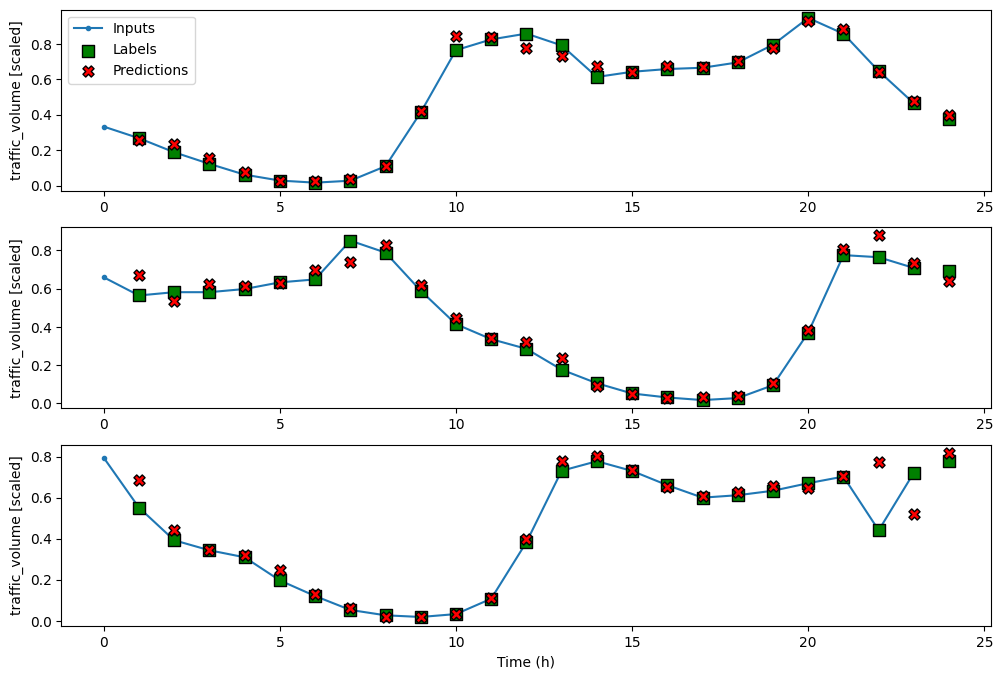

In [11]:
# visualize the predictions of our model on three sampled sequences
wide_window.plot(model=lstm_model)

In [12]:
# Values obtained from baseline and dnn models
mae_val = [0.083, 0.068, 0.033]
mae_test = [0.081, 0.068, 0.029]

# append the mae from LSTM single model
mae_val.append(val_performance['LSTM'][1])
mae_test.append(performance['LSTM'][1])

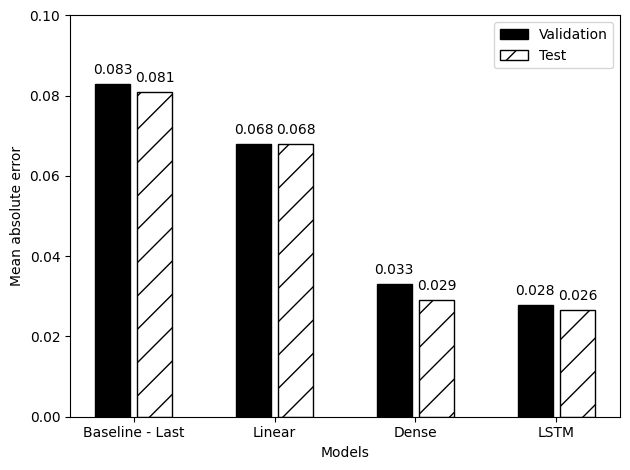

In [31]:
def plot_performance_metrics(mae_val, mae_test, labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM'], ylim=(0,0.1)):
    x = np.arange(len(labels))

    fig, ax = plt.subplots()
    ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
    ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
    ax.set_ylabel('Mean absolute error')
    ax.set_xlabel('Models')

    for index, value in enumerate(mae_val):
        plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
        
    for index, value in enumerate(mae_test):
        plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
        
    plt.ylim(*ylim)
    plt.xticks(ticks=x, labels=labels)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

plot_performance_metrics(mae_val, mae_test)

### Implementing an LSTM as a multi-step model
- A multi-step model to predict traffic volume for next 24 hours, using an input window of 24 hours.

In [15]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['traffic_volume'])

In [18]:
ms_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_lstm_model, multi_window, optimizer=Adam())

ms_val_performance = {}
ms_performance = {}

ms_val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
ms_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0835 - mean_absolute_error: 0.1437 - val_loss: 0.0196 - val_mean_absolute_error: 0.0978
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0165 - mean_absolute_error: 0.0900 - val_loss: 0.0169 - val_mean_absolute_error: 0.0865
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0146 - mean_absolute_error: 0.0817 - val_loss: 0.0157 - val_mean_absolute_error: 0.0826
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0139 - mean_absolute_error: 0.0784 - val_loss: 0.0152 - val_mean_absolute_error: 0.0801
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134 - mean_absolute_error: 0.0766 - val_loss: 0.0146 - val_mean_absolute_error: 0.0784
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0131 - mean_absolute_error: 0.0753 - val_loss: 0.0147 - val_mean_absolute_error: 0.0797
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130 - mean_absolute_error: 0.0748 - v

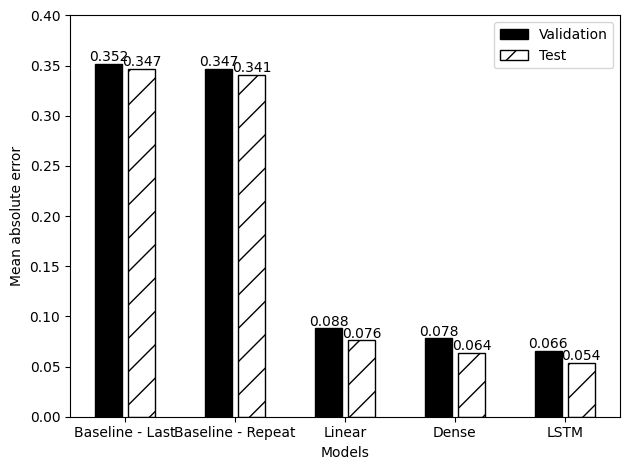

In [32]:
# Values obtained from baseline and dnn models
ms_mae_val = [0.352, 0.347, 0.088, 0.078]
ms_mae_test = [0.347, 0.341, 0.076, 0.064]

ms_mae_val.append(ms_val_performance['LSTM'][1])
ms_mae_test.append(ms_performance['LSTM'][1])

plot_performance_metrics(ms_mae_val, ms_mae_test, 
                         labels=['Baseline - Last', 'Baseline - Repeat', 'Linear', 'Dense', 'LSTM'],
                         ylim=(0,0.4)
)

- The LSTM is our most accurate model so far, as it achieved the lowest MAE on both the validation and test sets.

### Implementing an LSTM as a multi-output model
- The predictions will be for both the traffic volume and temperature at the next timestep.
- The `data_window` consists of an input of 24 timesteps and 24 timesteps of labels. 
    - The `shift=1` as we want to produce forecasts for the next timestep only.

In [34]:
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['temp','traffic_volume'])

In [35]:
mo_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units = 2)   # two units because we have two targets: the temperature and the traffic volume.
])

In [36]:
history = compile_and_fit(mo_lstm_model, mo_wide_window, optimizer=Adam())

mo_val_performance = {}
mo_performance = {}

mo_val_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.val)
mo_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.test, verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0648 - mean_absolute_error: 0.1255 - val_loss: 0.0096 - val_mean_absolute_error: 0.0639
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0537 - val_loss: 0.0038 - val_mean_absolute_error: 0.0396
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0386 - val_loss: 0.0028 - val_mean_absolute_error: 0.0345
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - mean_absolute_error: 0.0350 - val_loss: 0.0024 - val_mean_absolute_error: 0.0312
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - mean_absolute_error: 0.0321 - val_loss: 0.0020 - val_mean_absolute_error: 0.0285
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - mean_absolute_error: 0.0298 - val_loss: 0.0018 - val_mean_absolute_error: 0.0270
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - mean_absolute_error: 0.0284 - v

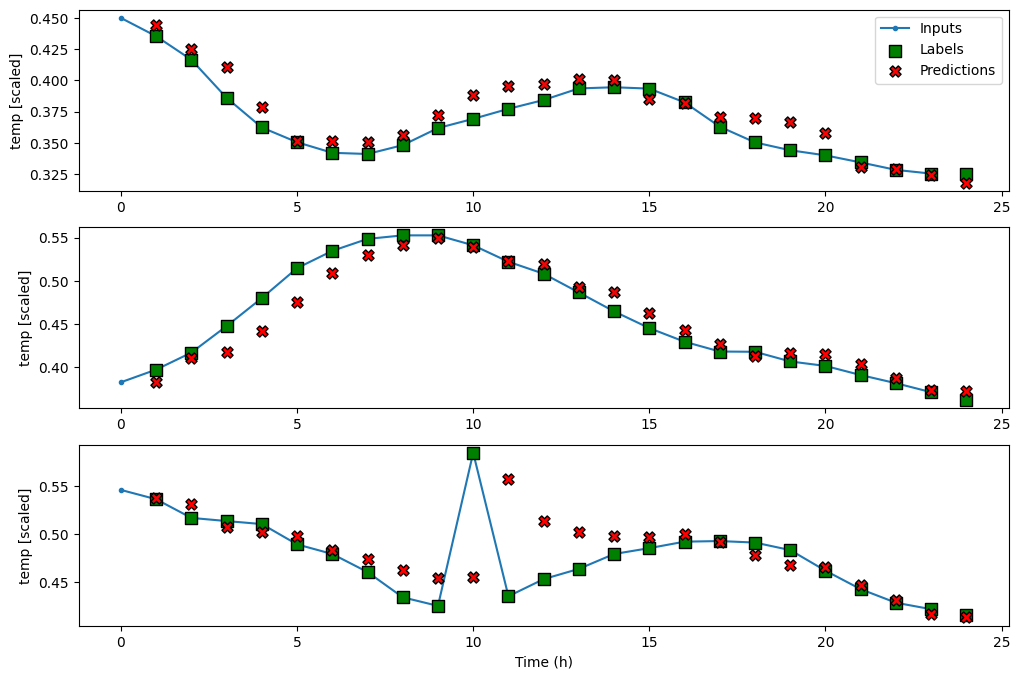

In [37]:
mo_wide_window.plot(model=mo_lstm_model, plot_col='temp')

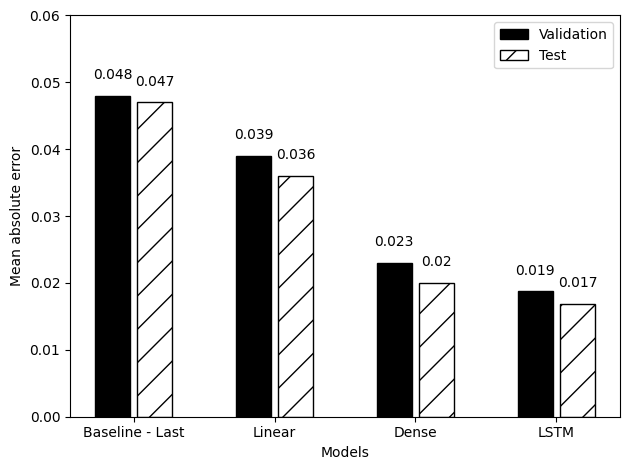

In [39]:
mo_mae_val = [0.048, 0.039, 0.023]
mo_mae_test = [0.047, 0.036, 0.020]

mo_mae_val.append(mo_val_performance['LSTM'][1])
mo_mae_test.append(mo_performance['LSTM'][1])

plot_performance_metrics(mo_mae_val, mo_mae_test, 
                         labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM'],
                         ylim=(0,0.06)
)

- The LSTM as the winning model, since it achieves the lowest MAE on the validation and test sets. Thus, it generated the most accurate predictions so far for both our targets.